<h1><font color = 'blue'><center>CVEN 5370 GIS Applications in Civil Egineering</center>

<h2><font color = 'red'><center>Shaseevarajan S</center>

<hr>

**Problem Statement**

We shall explore some basic Geopandas here

In [5]:
import geopandas as gpd
from matplotlib import pyplot as plt
import os

In [15]:
path = '/home/vu1/Shaseevarajan Sivanantharajah/TX_County_Boundaries'
fname = "County_Boundaries.shp"
os.chdir(path)

In [16]:
Tx = gpd.read_file(fname)

In [17]:
Tx.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006...."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621..."


In [18]:
Tx.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

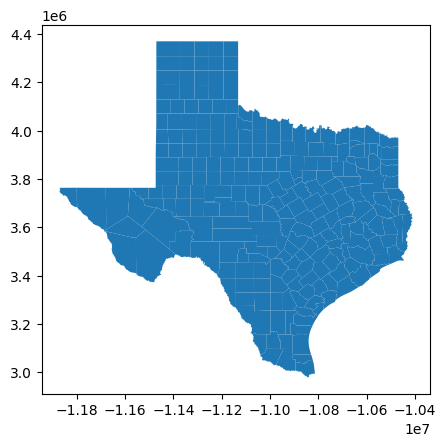

In [20]:
Tx.plot()

<Axes: >

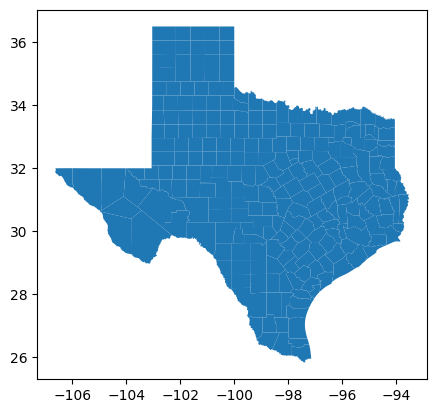

In [31]:
#Convert to CRS values
TxGCS84 = Tx.to_crs(epsg=4326)
TxGCS84.head()
TxGCS84.plot()

In [32]:
TxNAD27 = Tx.to_crs(epsg=4267)
TxNAD27.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-99.49998 29.08687, -99.50114 29.086..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-96.86527 29.6299, -96.86514 29.6298..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-95.28391 29.59749, -95.28381 29.597..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-96.17503 29.63356, -96.17477 29.633..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-99.41283 29.17331, -99.41283 29.180..."


<Axes: >

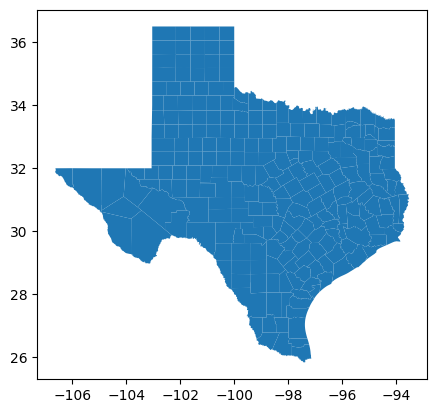

In [33]:
TxNAD27.plot()

In [35]:
#Convert to UTM
TxUTM14N = TxGCS84.to_crs(epsg=32614)
TxUTM15N = TxGCS84.to_crs(epsg=32615)

<Axes: >

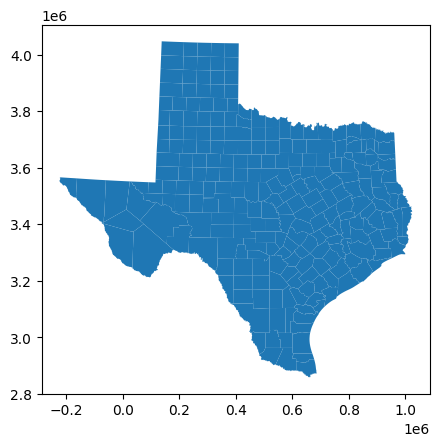

In [36]:
TxUTM14N.plot()

<Axes: >

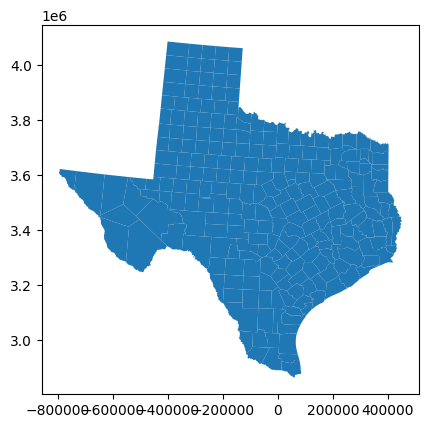

In [37]:
TxUTM15N.plot()

In [40]:
CF = 2_589_988.11
TxUTM14N['Areasqmi'] = TxUTM14N.area/CF
TxUTM15N['Areasqmi'] = TxUTM15N.area/CF

In [41]:
TxUTM14N.Areasqmi.mean()

np.float64(1053.1870943277395)

In [42]:
TxUTM15N.Areasqmi.mean()

np.float64(1062.5293180646493)

<Axes: >

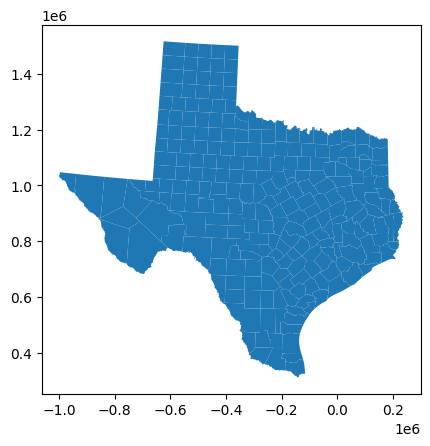

In [46]:
#Convert to AEA Conic and recalculate areas
TxAEC = TxGCS84.to_crs(epsg=5070)
TxAEC.plot()

In [56]:
TxAEC['Areasqmi']=TxAEC.area/CF
TxAECmean=TxAEC.Areasqmi.mean()
print('TxAECmean =', TxAECmean)

TxAECmean = 1052.0961565041964


In [57]:
TxxAECmean = float(TxAECmean)
round(TxxAECmean, 3)

1052.096

<Axes: >

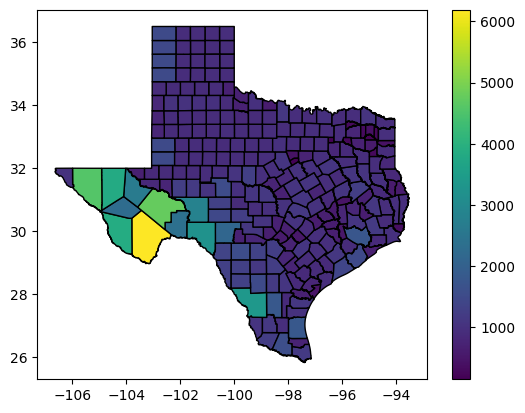

In [58]:
#Convert AEC to WGS84 and plot and color county by size
TxWGS84a = TxAEC.to_crs(epsg=4326)
TxWGS84a.plot(column = 'Areasqmi',cmap='viridis',legend=True, edgecolor='black')

<Axes: >

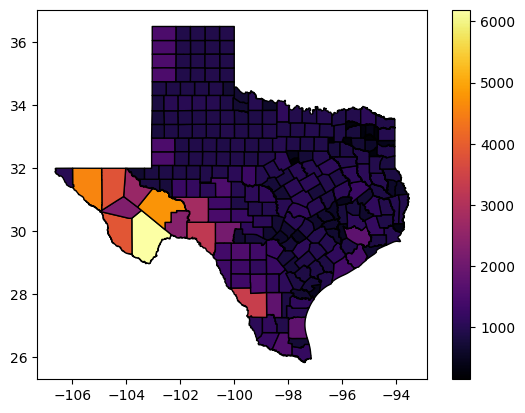

In [59]:
TxWGS84a.plot(column = 'Areasqmi',cmap='inferno',legend=True, edgecolor='black')

<Axes: >

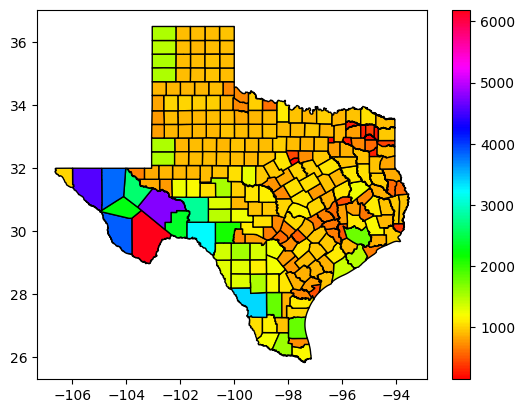

In [60]:
TxWGS84a.plot(column = 'Areasqmi',cmap='hsv',legend=True, edgecolor='black')